# Logistic Regression and linearly separable data

In this notebook we introduce the logistic regression for binary classification. We explore its decision boundary and regularization. 

In [1]:
%matplotlib inline
import numpy as np
import mglearn
import matplotlib.pyplot as plt

# import warnings; warnings.simplefilter('ignore')

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

We create a toy dataset with two features, x1 and x2, and two labels. Since there are only two features, we can visualize the entire dataset by plotting it:

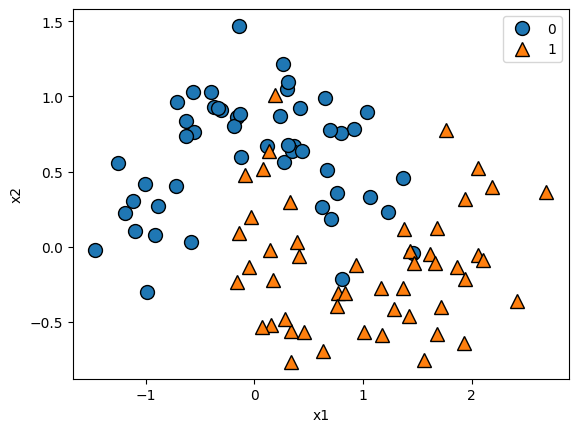

In [2]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

Lets train a decision tree on this dataset and see the decision boundary (since we are just exploring the algorithms, we don't bother splitting into train and test sets):

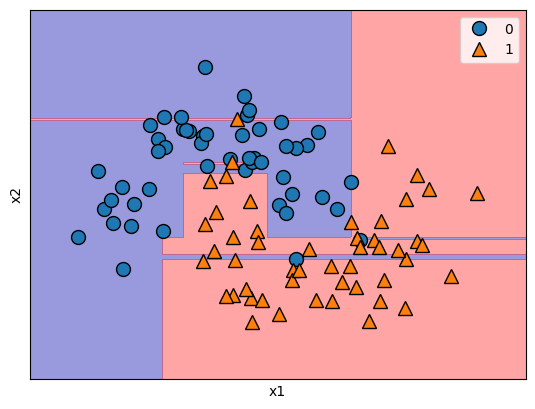

In [3]:
tree = DecisionTreeClassifier()
tree.fit(X,y)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
mglearn.plots.plot_2d_separator(tree, X, fill=True, eps=0.5, alpha=.4)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

We now do the same thing with a logistic regression classifier:

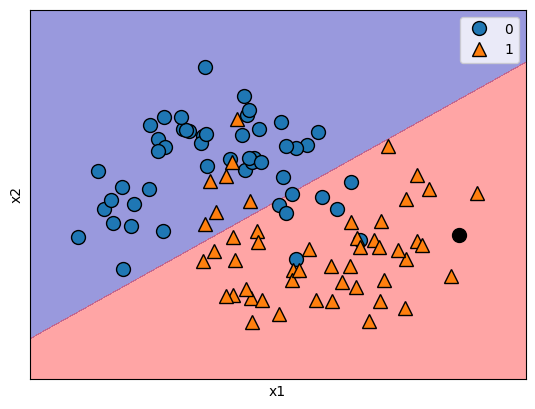

In [4]:
Logreg = LogisticRegression()
Logreg.fit(X,y)

mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.legend()
mglearn.plots.plot_2d_separator(Logreg, X, fill=True, eps=0.5, alpha=.4)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(2.5,0,'ko',markersize=10)

### Predicting with logistic regression

A big advantage of the logistic regression classifier is, that it calculates the probability that any instance belong to either of the two classes. You can access the probabilities using the **predict_proba** method (demonstrated below on the datapoint marked with a black dot above):

In [5]:
Logreg.predict_proba([[2.5,0]])

array([[0.0484133, 0.9515867]])

This tells you that the classifier believes that the specific datapoint has a 4.8% probability of belonging to class 0 and an 95.2% probability of belonging to class 1.

### Regularization: hyperparameters that control overfitting

There are two main hyperparameters we can tune to reduce overfitting:

- C: This determines the **cost** of having large coefficients.
- penalty: 'l1' or 'l2' (default). This determines the **type** of regularization. 

In the case of logistic regression, overfitting can be avoided by making sure that the prediction does not depend too strongly on any of the features - i.e. by requiring the coefficients to be *small*. The C parameter controls the "penalty" for having large weights: The smaller C is, the *larger* the penalty for having large weights. Therefore, a small value of C results in less overfitting.

We can choose between L2 regularization (which is the default), which aims at achieving weights as small as possible and L1 regularization, which aims at setting as many weights as possible equal to 0.

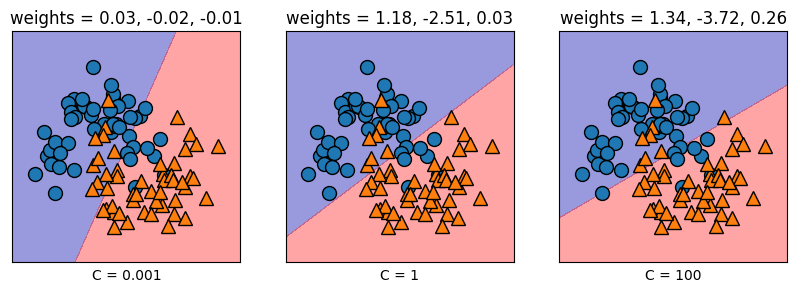

In [6]:
########### L2 - regularization: weights as small as possible #############

fig, axes = plt.subplots(1,3, figsize=(10,3))


for C, ax in zip([0.001, 1, 100], axes):
    Logreg = LogisticRegression(C=C)
    Logreg.fit(X,y)
    mglearn.plots.plot_2d_separator(Logreg, X, fill=True, eps=0.5, alpha=.4, ax=ax)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    W = Logreg.coef_[0]
    b = Logreg.intercept_[0]
    ax.set_xlabel("C = {}".format(C))
    ax.set_title("weights = {:.2f}, {:.2f}, {:.2f}".format(W[0], W[1], b))

In [7]:
########### L1 - regularization: as many weights as possible should be 0 ########

for C in [0.001, 0.1, 100]:
    Logreg = LogisticRegression(penalty='l1',C=C, solver='liblinear')
    Logreg.fit(X,y)
    W = Logreg.coef_[0]
    b = Logreg.intercept_[0]
    print("C = {:.4f}:\t weights =\t{:2f}, {:2f}, {:2f}".format(C,W[0],W[1],b))

C = 0.0010:	 weights =	0.000000, 0.000000, 0.000000
C = 0.1000:	 weights =	0.586322, -0.946299, 0.000000
C = 100.0000:	 weights =	1.342093, -3.731533, 0.258742


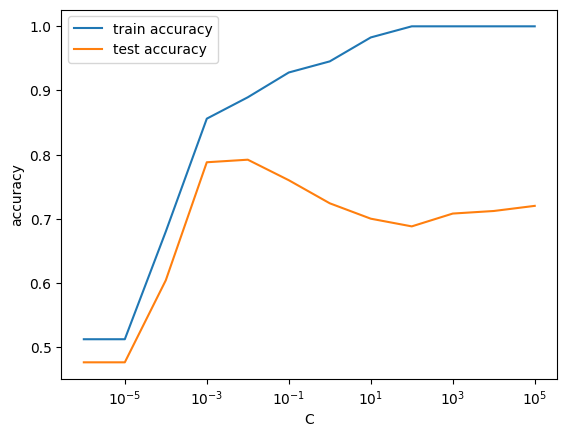

In [13]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# make sample data
X, y = make_classification(1000, 200, n_informative=195, random_state=42)
# split into train-test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# normalize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# train Logistic Regression models for different values of C
# and collect train and test accuracies
scores = {}
for C in (10**k for k in range(-6, 6)):
    lr = LogisticRegression(C=C)
    lr.fit(X_train, y_train)
    scores[C] = {'train accuracy': lr.score(X_train, y_train), 
                 'test accuracy': lr.score(X_test, y_test)}

# plot the accuracy scores for different values of C
pd.DataFrame.from_dict(scores, 'index').plot(logx=True, xlabel='C', ylabel='accuracy');

# Linearly separable data

Only looking for *linear* decision boundaries can seem pretty restrictive.
However, it often works well in higher dimensions, as illustrated below, and it has the advantage of being much faster computationally than looking for more general decision boundaries.

The more dimensions (i.e. the more features the data has), the more likely that it is possible to find a linear decision boundary, as illustrated below (pictures from http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/, where you can also read more about why adding more features is not necessarily a good idea).

Data not linearly separable in 1 dimension:
<img src="pictures/1Dproblem.png">

Data not linearly separable in 2 dimensions either:
<img src="pictures/2Dproblem.png">

But the same data set *is* linearly separable in 3 dimensions:
<img src="pictures/3Dproblem.png">
<img src="pictures/3Dproblem_separated.png">

This indicates that it will often be possible to find a linear decision boundary, as long as your data has a sufficient number of features. Let's test this on the breast cancer dataset:

## Logistic regression on cancer dataset - importances of features

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target,
                                                   random_state=42)
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Accuracy on training data: {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy on training data: 0.953
Accuracy on test data: 0.958


In case of decision trees or random forest, we could measure how important the algorithms found each feature to be by looking at the so-called "feature importances" of the tree/forest. In case of algorithms such as logistic regression, the importance is linked to the magnitude of the coefficients corresponding to each feature - these coefficients determine how big an influence each feature has on the prediction made by the algorithm. Below, we plot the coefficients obtained with 3 different values of the C-hyperparameter:

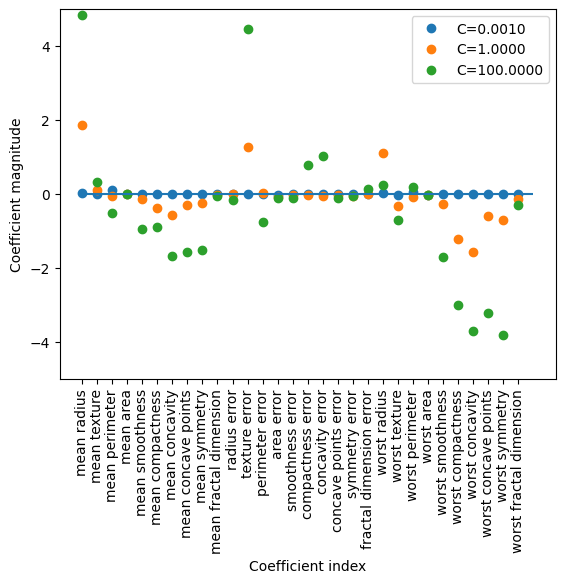

In [9]:
for C in [0.001, 1, 100]:
    Logreg = LogisticRegression(C=C,solver='liblinear')
    Logreg.fit(X_train,y_train)
    plt.plot(Logreg.coef_.T, 'o', label="C={:.4f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()